<Axes: title={'center': '2330 外資持股比率'}, xlabel='期別', ylabel='外資持股比率'>

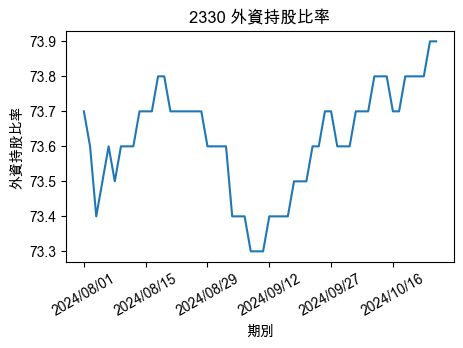

In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from io import StringIO

url = "https://goodinfo.tw/tw/ShowBuySaleChart.asp"
headers = {
    "referer":"https://goodinfo.tw/tw/ShowBuySaleChart.asp?STOCK_ID=2330",
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36"
}
rs = requests.session()
res = rs.get(url, headers = headers)
payload = {
    "STEP": "DATA",
    "STOCK_ID": "2330",
    "CHT_CAT": "DATE",
    "PRICE_ADJ": "F",
    "SHEET": "三大法人買賣張數",
    "START_DT": "2024-08-01",
    "END_DT": "2024-10-27"
}
cookies = dict(rs.cookies)
cookies.update({"SCREEN_SIZE":"1"})
res = rs.get(url, headers = headers, params = payload, cookies = cookies)
res.encoding = 'utf8'
soup = bs(res.text, 'lxml')
trs = soup.select('#tblDetail .bg_h2.fw_bold')
for tr in trs:
    tr.decompose()
tb = soup.select('#tblDetail')[0]
df = pd.read_html(StringIO(tb.prettify()))[0]
df.columns = ["期別","成交","漲跌","漲跌%","成交量張",
"外資買進張","外資賣出張","外資買賣超張","外資持股張","外資持股比率",
"投信買進張","投信賣出張","投信買賣超張",
"自營商買進張","自營商賣出張","自營商買賣超張",
"三大法人買進張","三大法人賣出張","三大法人買賣超張"]
df['期別'] = df['期別'].str.replace("'", "20")
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Arial Unicode MS" #Mac os:Arial Unicode MS
df.sort_values("期別").set_index('期別')["外資持股比率"].plot(figsize = (5, 3),
                                           title = "2330 外資持股比率",
                                           xlabel = "期別",
                                           ylabel = "外資持股比率",
                                            rot = 30)

AttributeError: 'list' object has no attribute 'columns'

In [3]:
type(rs.cookies)

requests.cookies.RequestsCookieJar

In [9]:

cookies

NameError: name 'update' is not defined